#  Linear Regression on Algerian Forest Fire

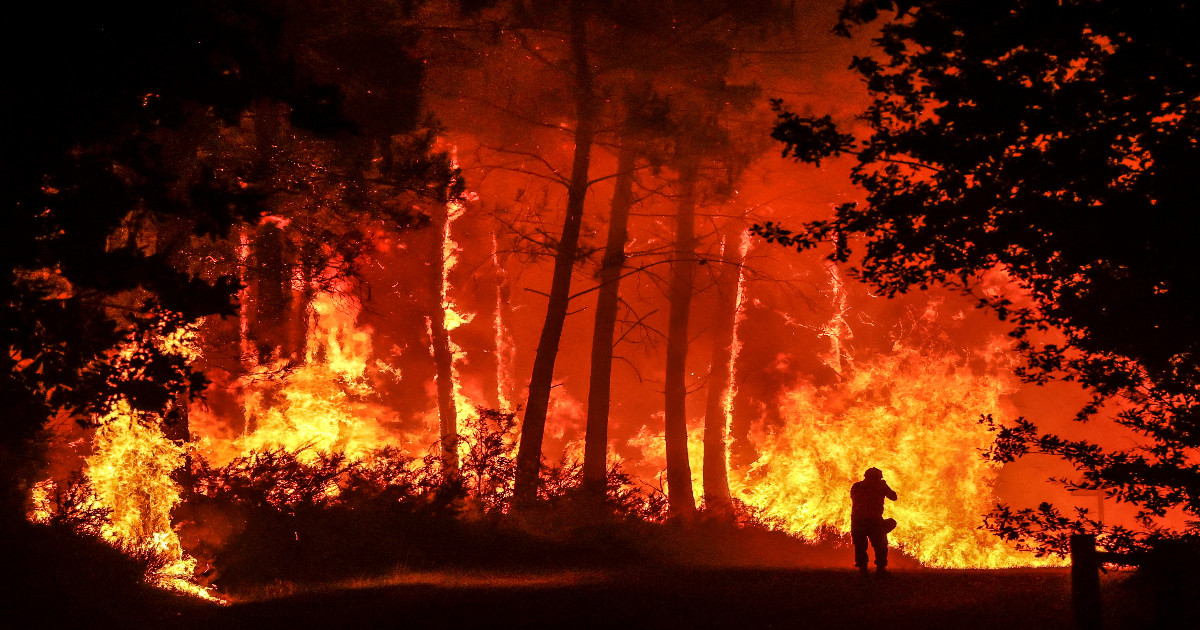

## Problem Statement
- To predict the temperature using Algerian Forest Fire Dataset

### We have perform
- `1.`  Data Collection
- `2.`  Exploratory Data Analysis
- `3.`  Data Cleaning
- `4.`  Graphical Analysis
- `5.`  Outliers Handling
- `6.`  Removal of Outliers
- `7.`  Model Building
- `8.`  Linear Regression Model
- `9.`  Ridge Regression Model
- `10.`  Lasso Regression Model
- `11.` ElasticNet Regression Model
- `12.` Comparision of all models
- `13.` Conclusion

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

### Data Collection

In [2]:
df = pd.read_csv(r"G:\Udemy\DATA SCIENCE ineuron\Resources\1_Oct_22\Algerian_forest_fires_dataset_UPDATE.csv",header = 1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## Exploratory Data Analysis

#### Checking Null Values

In [4]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [5]:
df[df['Classes  '].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


#### Drop rows which have null

In [6]:
# one way of doing this
df1 = df.dropna()

In [7]:
# Another way of removing null values
df.drop([122,123,167],axis = 0, inplace = True)
df = df.reset_index()
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [8]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

- Some columns have extra spaces, we have to remove them

#### Columns name having extra spaces

In [9]:
[x for x in df.columns if " " in x]

[' RH', ' Ws', 'Rain ', 'Classes  ']

#### Removed extra space in column names

In [10]:
df.columns = df.columns.str.strip()
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

#### Function to remove extra space in data

In [11]:
def Remove_Extra_Space2(x):
    return x.replace(" ","")

#### Remove extra space in the data

In [12]:
df['Classes'] = df['Classes'].apply(Remove_Extra_Space2)

In [13]:
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,notfire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,notfire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,notfire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,notfire


#### Drop extra index column, which was created for reset_index

In [14]:
df.drop(['index'],axis = 1, inplace = True)

In [15]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,notfire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,notfire


#### Create one region,just to identify the two region i.e.,Sidi-Bel Abbes Region and Bejaia Region

In [16]:
df.loc[:122, 'Region'] = 0
df.loc[122:, 'Region'] = 1

In [17]:
df[120:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,notfire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,notfire,0.0
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,notfire,1.0
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,notfire,1.0


#### Check null values in all the features

In [18]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

#### Map `Classes` feature as 1 and 0 for fire and not fire respectively

In [19]:
df['Classes'] = df['Classes'].map({'notfire' : 0, 'fire' : 1})

In [20]:
df[235:240]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
235,23,09,2012,35,56,14,0,89,29.4,115.6,7.5,36,15.2,1,1.0
236,24,09,2012,26,49,6,2,61.3,11.9,28.1,0.6,11.9,0.4,0,1.0
237,25,09,2012,28,70,15,0,79.9,13.8,36.1,2.4,14.1,3,0,1.0
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1,1.0
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0,1.0


#### Check duplictes values in all the column

In [21]:
df.duplicated().sum()

0

#### Check data types of all the features

In [22]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes          int64
Region         float64
dtype: object

#### Convert features to its logical datatypes

In [23]:
convert_features = {
    'Temperature' : 'int64','RH':'int64', 'Ws' :'int64', 'DMC': 'float64', 'DC': 'float64', 'ISI' : 'float64',
    'BUI': 'float64', 'FWI' : 'float64', 'Region' : 'object', 'Rain' : 'float64', 'FFMC' : 'float64', 'Classes' : 'object',
    'day' : 'object', 'month' : 'object', 'year' : 'object'
}

df = df.astype(convert_features)

In [24]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,05,06,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


#### Converted Datatypes

In [25]:
df.dtypes

day             object
month           object
year            object
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object

#### Check unique values in all features

In [26]:
df.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            125
Classes          2
Region           2
dtype: int64

#### Check Statistics of dataset

In [27]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


#### Segregate categorical feature from the dataset

In [28]:
categorical_feature = [x for x in df.columns if df[x].dtypes == 'O']
categorical_feature

['day', 'month', 'year', 'Classes', 'Region']

#### Check Value_counts() of Classes and Region feature

In [31]:
feature = ['Region','Classes']
for fea in categorical_feature:
    if fea in feature:
        print(df.groupby(fea)[fea].value_counts())

Classes  Classes
0        0          106
1        1          137
Name: Classes, dtype: int64
Region  Region
0.0     0.0       122
1.0     1.0       121
Name: Region, dtype: int64


#### Segregate numerical feature from the dataset

In [32]:
numerical_features = [x for x in df.columns if df[x].dtype != 'O']
numerical_features

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

#### Segregate discrete feature from the numerical feature

In [33]:
## Discrete features are those whose data is whole number means there is no decimal value
discrete_features = [x for x in numerical_features if df[x].dtypes == 'int64']
discrete_features

['Temperature', 'RH', 'Ws']

#### Segregate Continuous feature from the numerical feature

In [34]:
## Continuous features are those features where data has decimal value
continuous_feature = [fea for fea in numerical_features if fea not in discrete_features]
continuous_feature

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Graphical Analysis

#### Checking distribution of Continuous numerical features

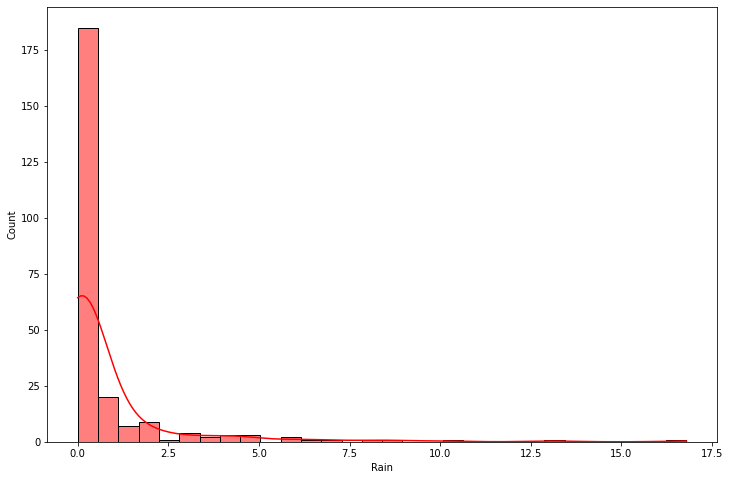

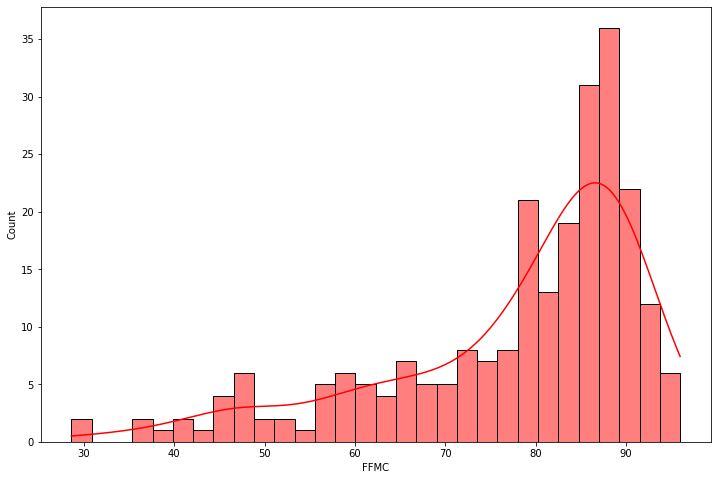

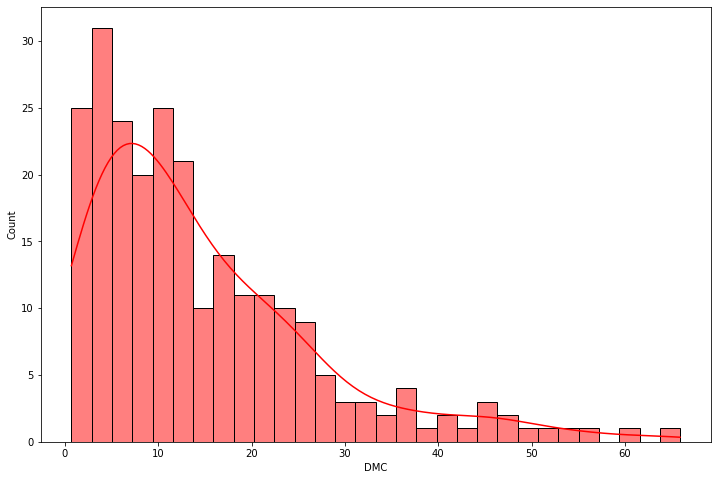

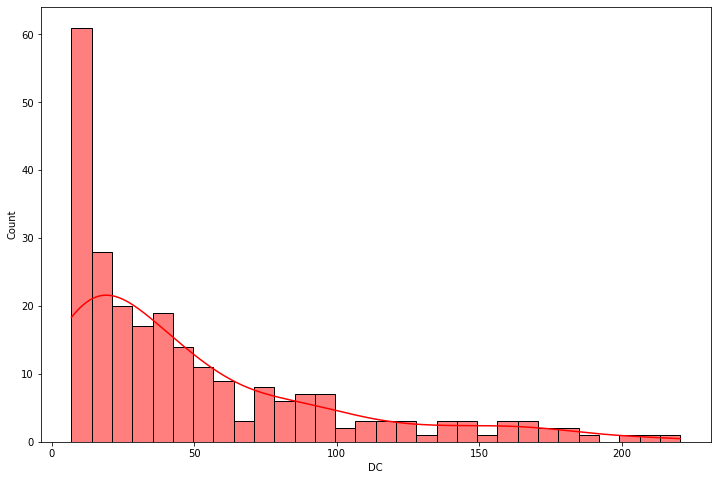

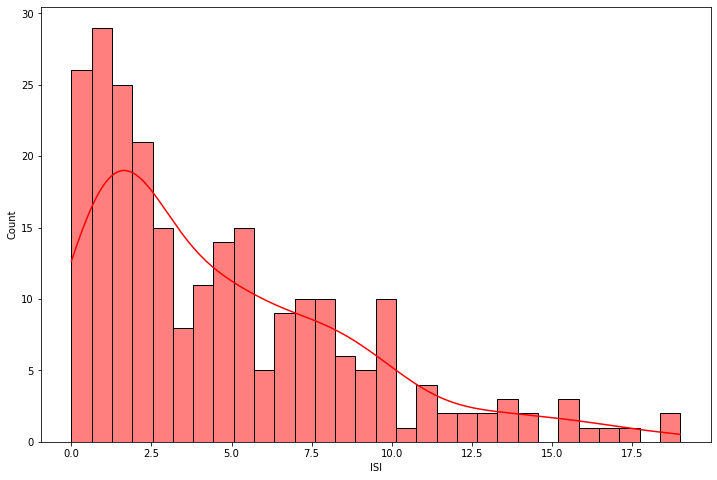

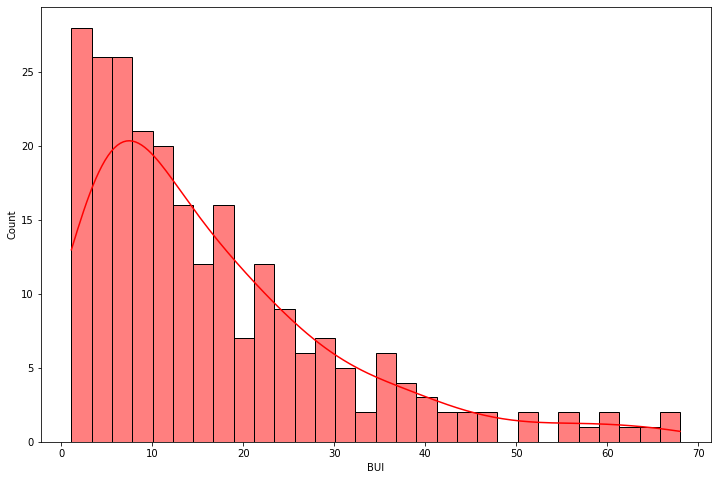

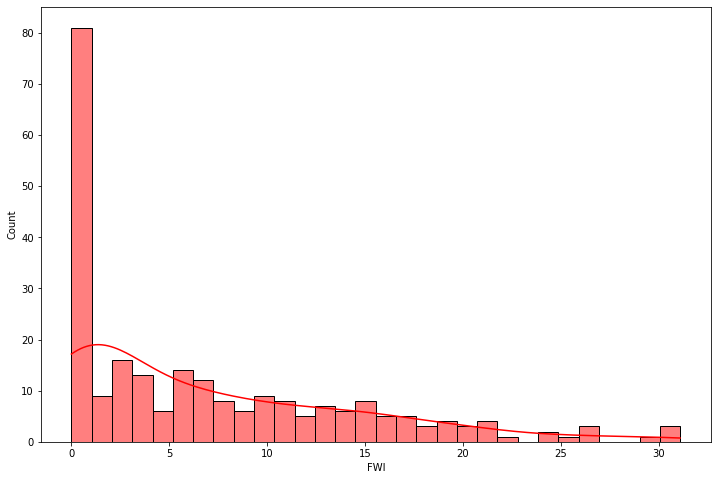

In [35]:
for feature in continuous_feature:
    plt.figure(figsize = (12,8))
    sns.histplot(data = df, x = feature,kde = True, bins = 30,color = "red")
    plt.show()

# Outliers Handing
#### Before Removing Outliers

Text(0.5, 1.0, 'Before Removing Outliers')

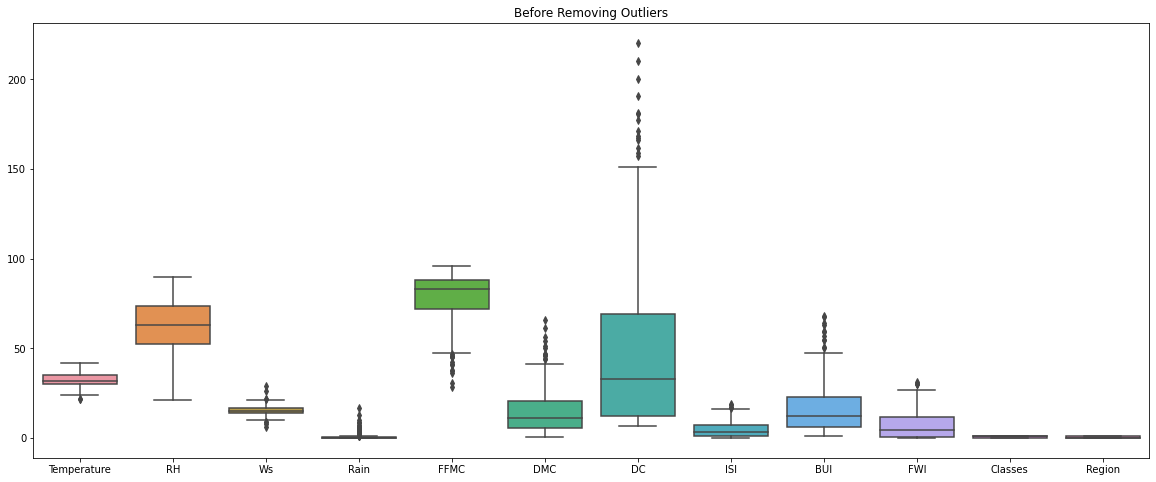

In [36]:
plt.figure(figsize=(20,8))
sns.boxplot(data = df)
plt.title("Before Removing Outliers")

#### Function to find upper and lower boundaries

In [37]:
def find_boundaries(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR*1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR*1.5)
    return upper_boundary,lower_boundary

In [38]:
## Upper and Lower boundaries of every feature
for fea in numerical_features:
    print(fea,"---->",find_boundaries(df,fea))

Temperature ----> (42.5, 22.5)
RH ----> (105.0, 21.0)
Ws ----> (21.5, 9.5)
Rain ----> (1.25, -0.75)
FFMC ----> (112.975, 47.17499999999999)
DMC ----> (43.29999999999999, -16.699999999999992)
DC ----> (154.22499999999997, -72.77499999999999)
ISI ----> (16.025, -7.374999999999998)
BUI ----> (47.625, -18.974999999999998)
FWI ----> (27.575, -15.425)


#### Deletion of outliers

In [39]:
outliers_columns = ['Temperature', 'Ws', 'Rain', 'FFMC','DMC','ISI','BUI','FWI']
for i in outliers_columns:
    upper_boundary, lower_boundary = find_boundaries(df,i)
    outliers = np.where(df[i] > upper_boundary, True, np.where (df[i] < lower_boundary, True, False))
    outliers_df = df.loc[outliers, i]
    df_trimed = df.loc[~outliers,i]
    df[i] = df_trimed

#### After Removal of outliers

Text(0.5, 1.0, 'After Removing Outliers')

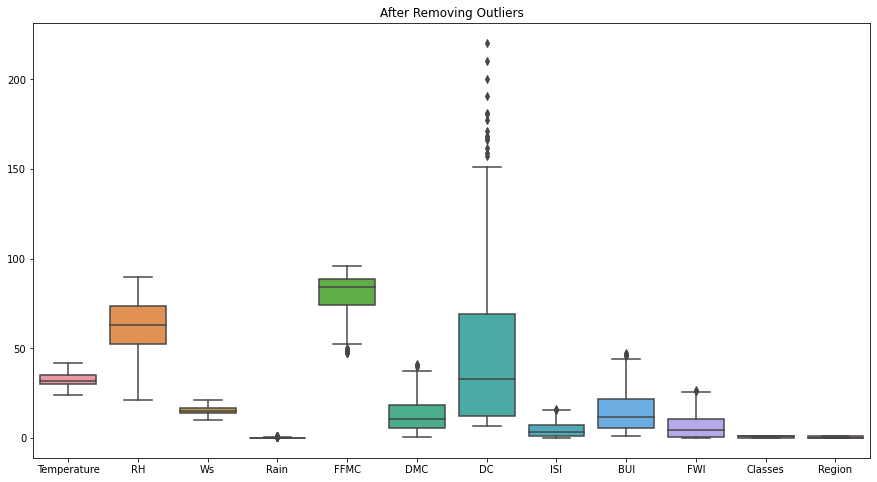

In [40]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("After Removing Outliers")

- Still there are many outliers in DC feature

#### Outliers handling in DC Feature

Text(0.5, 1.0, 'Before Removing Outliers')

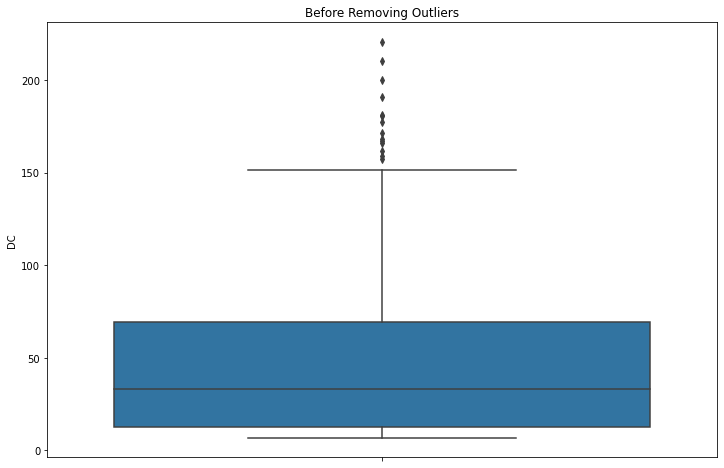

In [41]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df, y = 'DC')
plt.title("Before Removing Outliers")

In [42]:
# These are the outliers of DC Feature
DC_outliers = df[df['DC'] >= 154]['DC']
DC_outliers

83     161.5
84     171.3
85     181.3
86     190.6
87     200.2
88     210.4
89     220.4
90     180.4
206    157.5
207    167.2
208    177.3
209    166.0
211    159.1
212    168.2
Name: DC, dtype: float64

In [43]:
df["DC"] = df[df['DC'] < 118]['DC']

Text(0.5, 1.0, 'After Removig ouliers')

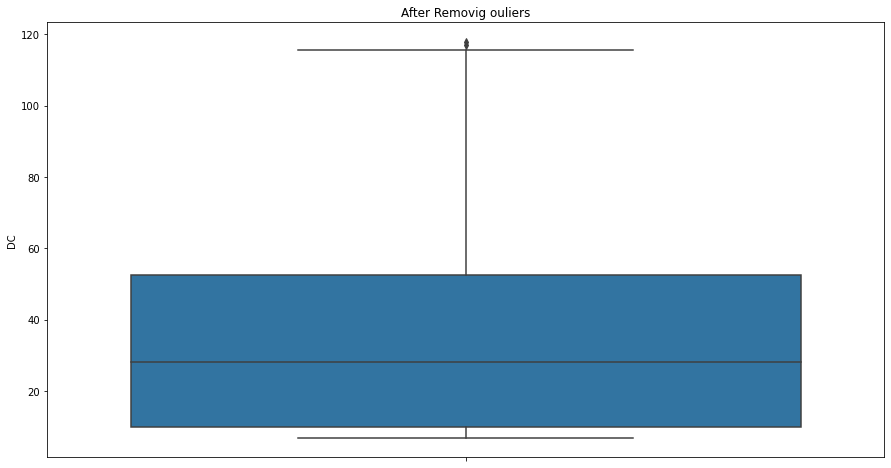

In [44]:
plt.figure(figsize = (15,8))
sns.boxplot(data = df, y ='DC')
plt.title("After Removig ouliers")

#### Check null value in each column after removing the outliers

In [45]:
df.isna().sum()

day             0
month           0
year            0
Temperature     2
RH              0
Ws              8
Rain           35
FFMC           13
DMC            12
DC             25
ISI             4
BUI            11
FWI             4
Classes         0
Region          0
dtype: int64

#### Fill all the null values with mean

In [46]:
df.fillna(df.mean().round(1), inplace = True)

#### Check null value of each column

In [47]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

# Statistical Analysis
#### Correlation of numerical variable

In [48]:
data = round(df.corr(),2)
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.00,-0.64,-0.22,-0.13,0.54,0.55,0.37,0.58,0.49,0.58,0.51,0.25
RH,-0.64,1.00,0.16,0.14,-0.54,-0.45,-0.28,-0.64,-0.38,-0.54,-0.43,-0.40
Ws,-0.22,0.16,1.00,0.06,-0.11,-0.01,0.00,0.05,0.06,0.05,-0.02,-0.15
Rain,-0.13,0.14,0.06,1.00,-0.54,-0.31,-0.34,-0.46,-0.32,-0.44,-0.52,-0.05
FFMC,0.54,-0.54,-0.11,-0.54,1.00,0.60,0.52,0.75,0.59,0.71,0.77,0.18
DMC,0.55,-0.45,-0.01,-0.31,0.60,1.00,0.68,0.64,0.92,0.75,0.62,0.21
DC,0.37,-0.28,0.00,-0.34,0.52,0.68,1.00,0.51,0.76,0.58,0.55,-0.03
ISI,0.58,-0.64,0.05,-0.46,0.75,0.64,0.51,1.00,0.62,0.89,0.75,0.23
BUI,0.49,-0.38,0.06,-0.32,0.59,0.92,0.76,0.62,1.00,0.75,0.61,0.13
FWI,0.58,-0.54,0.05,-0.44,0.71,0.75,0.58,0.89,0.75,1.00,0.74,0.19


<AxesSubplot:>

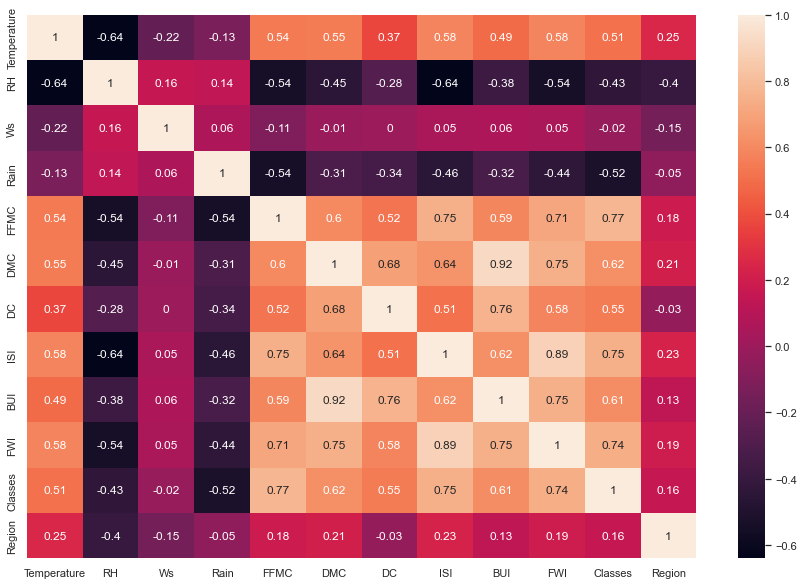

In [49]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data = data, annot = True)

### Observations
- 1. BUI and DMC are 92% Positively correlated
- 2. FWI and ISI are 89% Positively Correlated
- 3. No features are more then 95% Postively correlated, therefore we cannot drop any feature

# Model Building
Independent Variable vs target variable distribution

#### Convert `day` ,`month`, `year` feature into one `Date` feature

In [50]:
df['Date'] = pd.to_datetime(df[['day','month','year']])

In [51]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,01,06,2012,29.0,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0,2012-06-01
1,02,06,2012,29.0,61,13.0,0.2,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0,2012-06-02
2,03,06,2012,26.0,82,15.5,0.2,80.0,2.5,7.1,0.3,2.7,0.1,0,0.0,2012-06-03
3,04,06,2012,25.0,89,13.0,0.2,80.0,1.3,6.9,0.0,1.7,0.0,0,0.0,2012-06-04
4,05,06,2012,27.0,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0,2012-06-05


### Scatterplot day vs temperature

<AxesSubplot:xlabel='day', ylabel='Temperature'>

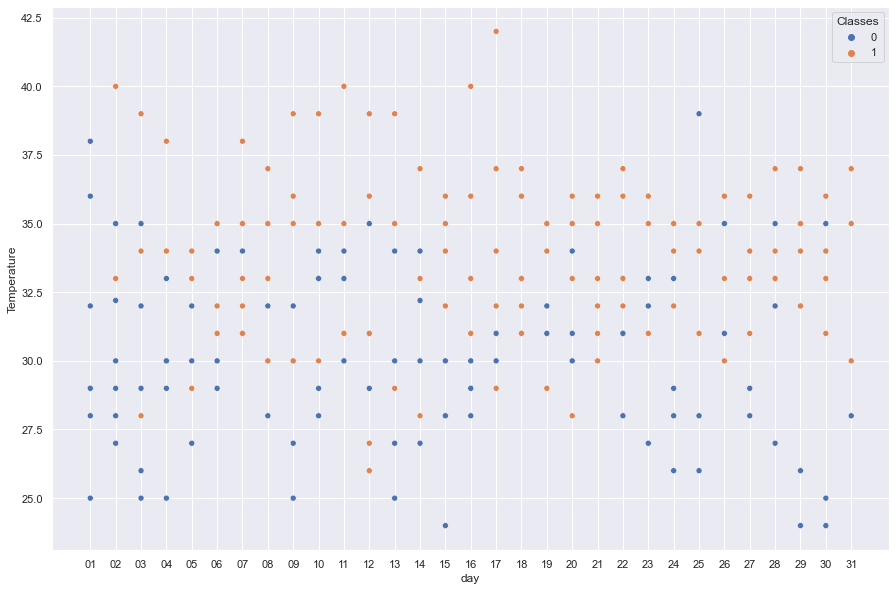

In [52]:
sns.scatterplot(data =df, x ='day', y='Temperature', hue = 'Classes')

### Regression Plot

In [53]:
consider_feature = [fea for fea in df.columns if fea not in ['Temperature','day','month','year','Date','Region','Classes']]
consider_feature

['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

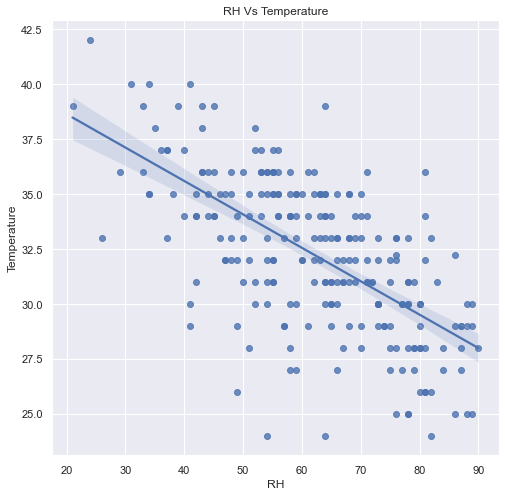

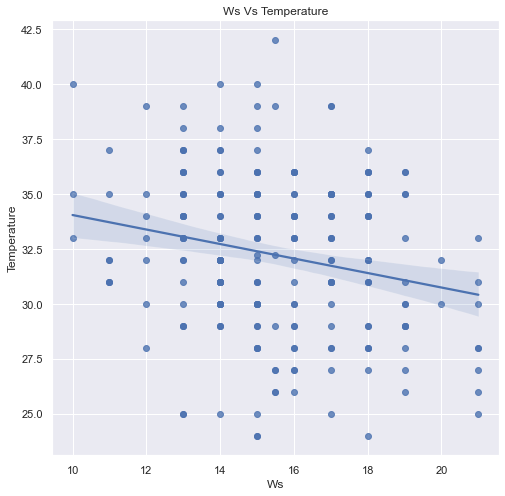

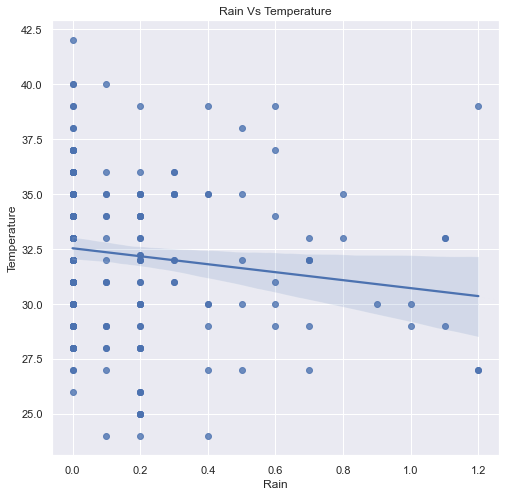

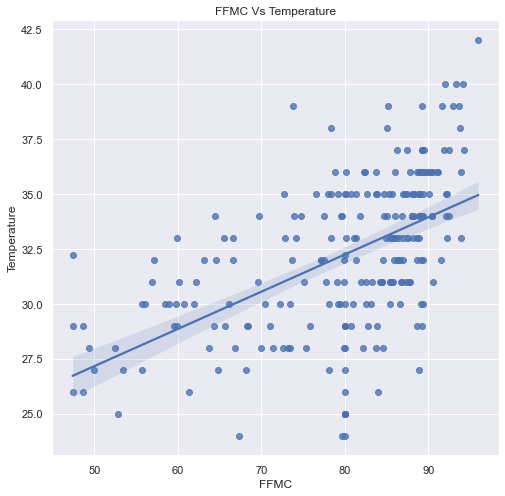

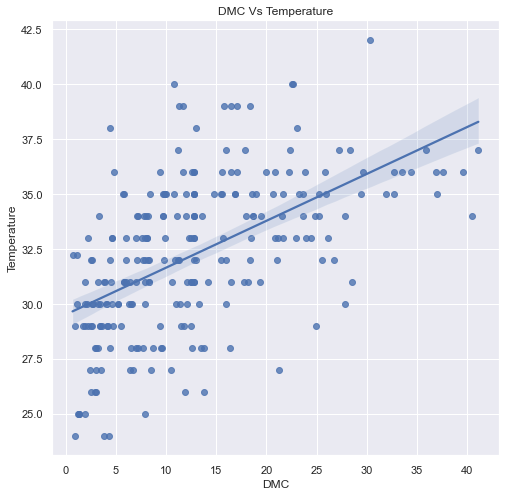

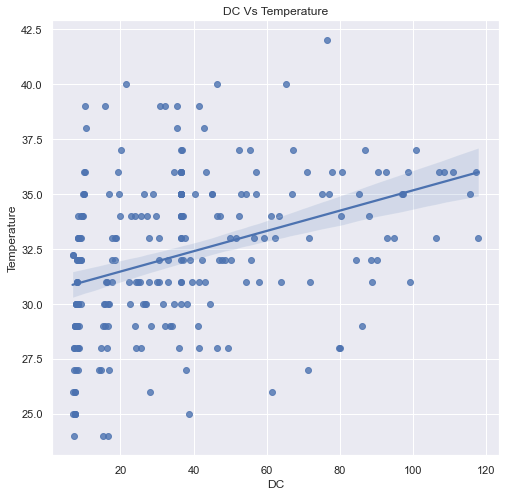

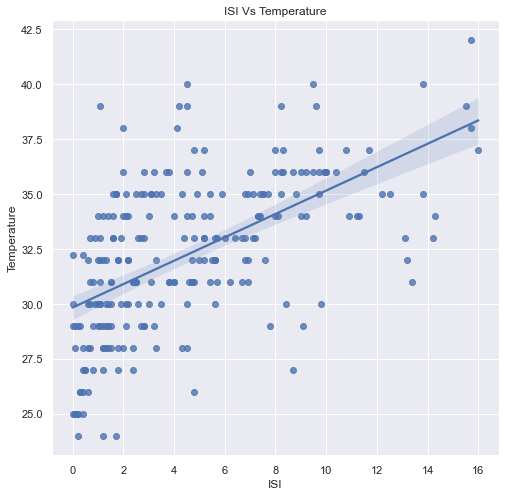

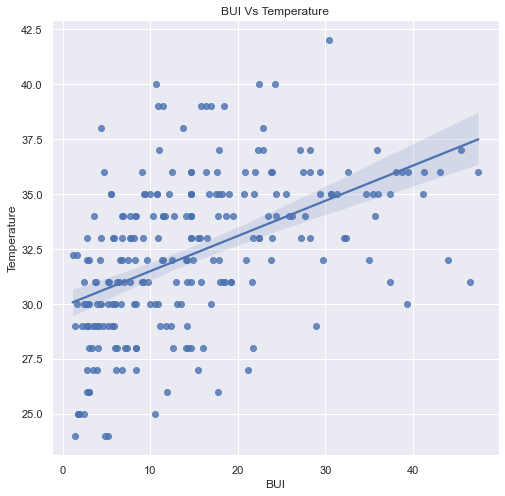

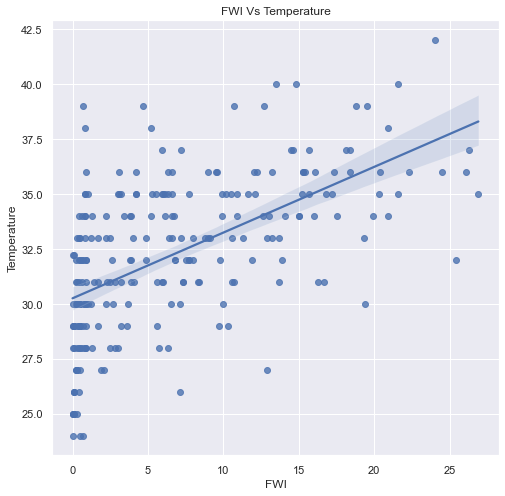

In [54]:
for feature in consider_feature:
    sns.set(rc={'figure.figsize':(8,8)})
    sns.regplot(x = df[feature], y = df['Temperature'])
    plt.xlabel(feature)
    plt.ylabel("Temperature")
    plt.title("{} Vs Temperature".format(feature))
    plt.show()

- Shaded region is basically with respect to Ridge and Lasso Regression

### Segregate dependent and independent feature

In [55]:
### X : independent feature \\ y : dependent feature
X = df[['RH', 'Ws', 'Rain','FFMC', 'DMC', 'ISI','DC',
       'FWI', 'Classes', 'Region']]
y = df[['Temperature']]

In [56]:
X.head()    # Independent features

,RH,Ws,Rain,FFMC,DMC,ISI,DC,FWI,Classes,Region
0,57,18.0,0.0,65.7,3.4,1.3,7.6,0.5,0,0.0
1,61,13.0,0.2,64.4,4.1,1.0,7.6,0.4,0,0.0
2,82,15.5,0.2,80.0,2.5,0.3,7.1,0.1,0,0.0
3,89,13.0,0.2,80.0,1.3,0.0,6.9,0.0,0,0.0
4,77,16.0,0.0,64.8,3.0,1.2,14.2,0.5,0,0.0


In [57]:
y.head()    # Dependent features

,Temperature
0,29.0
1,29.0
2,26.0
3,25.0
4,27.0


### Splitt the data into training and test dataset

In [58]:
### random state train test split will be same with all people using random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### StandardScalar

In [59]:
### creating a StandardScalar object
scaler = StandardScaler()
scaler

StandardScaler()

In [60]:
### Using fit_transform to standardise Train data
X_train = scaler.fit_transform(X_train)

In [61]:
### Here using only transform to avoid data leakage
### (training mean and training standard deviation will be used for standard isolation of test when we use transform on test data)
X_test = scaler.transform(X_test)

# Linear Regression Model

In [62]:
## creating linear regression model
linear_reg = LinearRegression()
linear_reg

LinearRegression()

#### Passing training data (X and y) to the model

In [63]:
linear_reg.fit(X_train, y_train)

LinearRegression()

#### Printing co-efficients and intercept of best fit hyperplane

In [64]:
print("1. Co-efficients of independent features is {}".format(linear_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(linear_reg.intercept_))

1. Co-efficients of independent features is [[-1.62572989 -0.60047117  0.28921192 -0.05938927  0.76367662  0.00760549
  -0.15916525  0.43191456  0.62332559 -0.26791113]]
2. Intercept of best fit hyper plane is [32.1617284]


### Prediction of test data

In [65]:
linear_reg_pred = linear_reg.predict(X_test)
linear_reg_pred[:5]

array([[32.87012119],
       [34.23661089],
       [30.17838715],
       [32.47680473],
       [32.63326791]])

In [66]:
# The difference between y_test and linear_reg_pred
residual_linear_reg = y_test - linear_reg_pred
residual_linear_reg[:5]

,Temperature
24,-1.870121
6,-1.236611
152,-2.178387
232,1.523195
238,-2.633268


## Validation of Linear Regression assumptions

#### 1. Linear Relationship

Text(0, 0.5, 'Test Predicted Data')

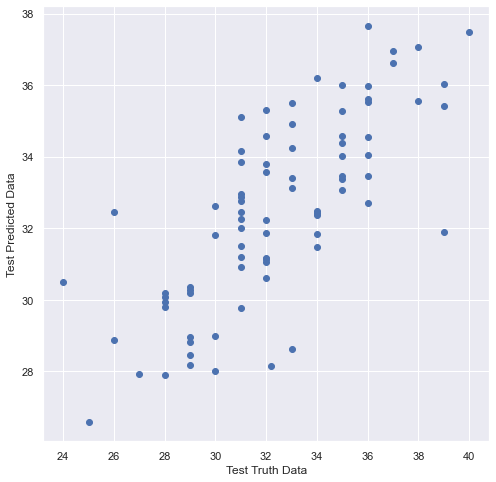

In [67]:
plt.scatter(y_test,linear_reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

#### 2. Residual should be normally distributed

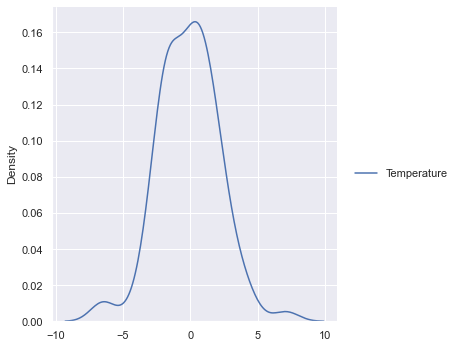

In [68]:
sns.displot(data = residual_linear_reg, kind ="kde")

#### 3. Residual and Predicted values should follow uniform distribution

Text(0, 0.5, 'Residuals')

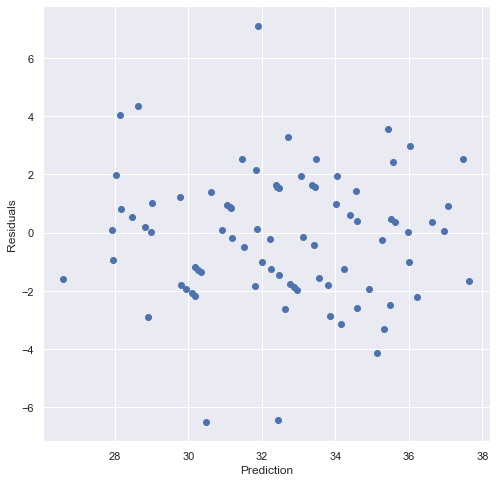

In [69]:
plt.scatter(linear_reg_pred,residual_linear_reg)
plt.xlabel("Prediction")
plt.ylabel('Residuals')

## Cost Function Values

In [70]:
print(f"MSE : {round(mean_squared_error(y_test,linear_reg_pred),2)}")
print(f"MAE : {round(mean_absolute_error(y_test,linear_reg_pred),2)}")
print(f"RMSE : {round(np.sqrt(mean_squared_error(y_test,linear_reg_pred)),2)}")

MSE : 5.01
MAE : 1.74
RMSE : 2.24


## Performance Metrics

In [73]:
linear_score = r2_score(y_test,linear_reg_pred)
print(f"R-Square Accuracy : {round(linear_score*100,2)}%")
print(f"Adjusted R-Square Accuracy : {round((1 - (1-linear_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100,2)}%")

R-Square Accuracy : 56.52%
Adjusted R-Square Accuracy : 50.31%


# Ridge Regresion Model

In [74]:
## creating Ridge regression model
ridge_reg=Ridge()
ridge_reg

Ridge()

In [75]:
### Passing training data(X and y) to the model
ridge_reg.fit(X_train, y_train)

Ridge()

In [76]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(ridge_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(ridge_reg.intercept_))

1. Co-efficients of independent features is [[-1.60178318 -0.59652426  0.29122038 -0.04397446  0.75428229  0.0345659
  -0.15042974  0.41984204  0.606996   -0.25830502]]
2. Intercept of best fit hyper plane is [32.1617284]


#### Prediction of test data

In [77]:
ridge_reg_pred = ridge_reg.predict(X_test)

In [78]:
residual_ridge_reg = y_test - ridge_reg_pred
residual_ridge_reg[:5]

,Temperature
24,-1.866884
6,-1.217160
152,-2.170534
232,1.510022
238,-2.634740


# Validation of Ridge Regression assumptions
#### 1. Linear Relationship

Text(0, 0.5, 'Predicted data')

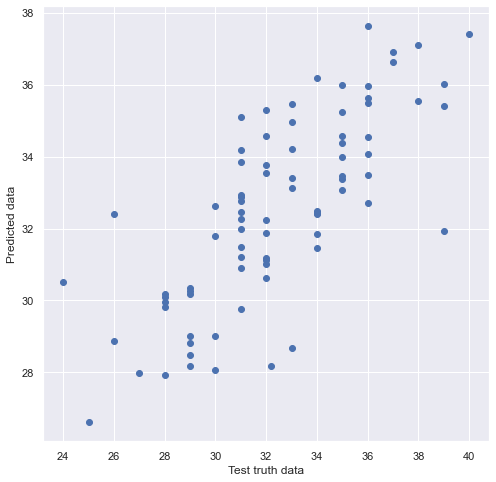

In [79]:
plt.scatter(x=y_test,y=ridge_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

#### 2. Residual should be normally distributed

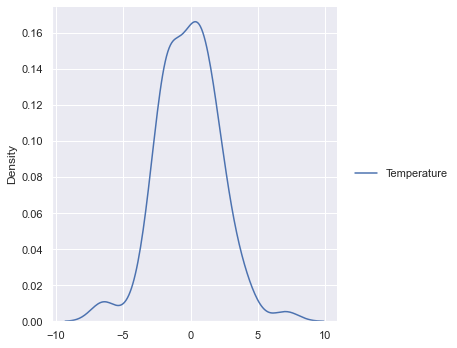

In [80]:
sns.displot(data = residual_ridge_reg, kind='kde')

#### 3. Residual and Predicted values should follow uniform distribution

Text(0, 0.5, 'Residuals')

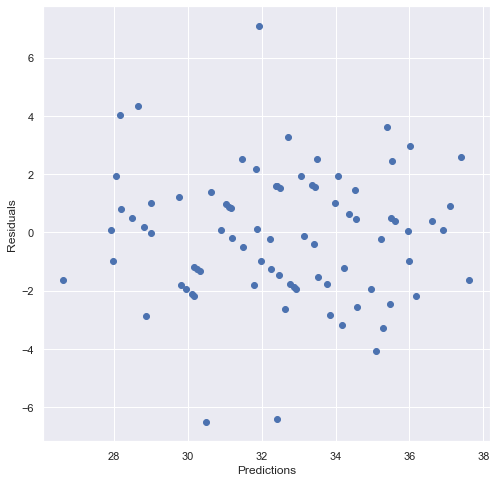

In [81]:
plt.scatter(x=ridge_reg_pred, y=residual_ridge_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

## Cost Function Values

In [82]:
print(f"MSE : {round(mean_squared_error(y_test,ridge_reg_pred),2)}")
print(f"MAE : {round(mean_absolute_error(y_test,ridge_reg_pred),2)}")
print(f"RMSE : {round(np.sqrt(mean_squared_error(y_test,ridge_reg_pred)),2)}")

MSE : 4.99
MAE : 1.74
RMSE : 2.23


## Performance Metrics

In [83]:
Ridge_score = r2_score(y_test,ridge_reg_pred)
print(f"R-Square Accuracy : {round(Ridge_score*100,2)}%")
print(f"Adjusted R-Square Accuracy : {round((1 - (1-Ridge_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100,2)}%")

R-Square Accuracy : 56.67%
Adjusted R-Square Accuracy : 50.48%


## Lasso Regression Model

In [84]:
## creating Lasso regression model
lasso_reg = Lasso()
lasso_reg

Lasso()

In [85]:
### Passing training data(X and y) to the model
lasso_reg.fit(X_train, y_train)

Lasso()

In [86]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(lasso_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(lasso_reg.intercept_))

1. Co-efficients of independent features is [-1.08278202 -0.         -0.          0.          0.23127133  0.
  0.          0.2378896   0.          0.        ]
2. Intercept of best fit hyper plane is [32.1617284]


#### Prediction of test data

In [87]:
lasso_reg_pred = lasso_reg.predict(X_test)
lasso_reg_pred[:5]

array([32.16299347, 32.74098733, 32.05836623, 32.55720977, 32.07186032])

In [88]:
y_test = y_test.squeeze()
residual_lasso_reg = y_test - lasso_reg_pred
residual_lasso_reg[:5]

24    -1.162993
6      0.259013
152   -4.058366
232    1.442790
238   -2.071860
Name: Temperature, dtype: float64

# Validation of Lasso Regression assumptions
#### 1. Linear Relationship

Text(0, 0.5, 'Predicted data')

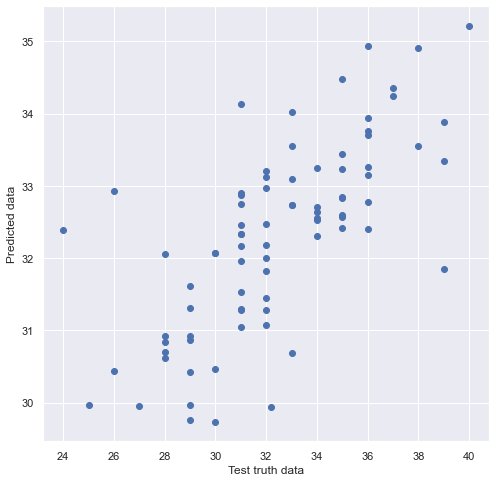

In [89]:
plt.scatter(y_test, lasso_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

#### 2. Residual should be normally distributed

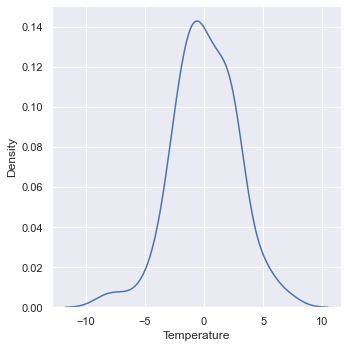

In [90]:
sns.displot( residual_lasso_reg, kind='kde')

#### 3. Residual and Predicted values should follow uniform distribution

Text(0, 0.5, 'Residuals')

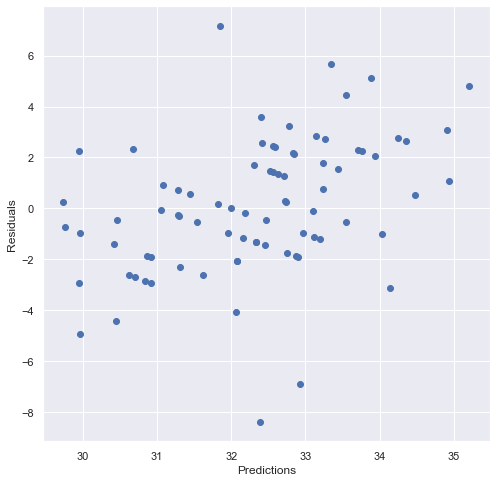

In [91]:
plt.scatter(lasso_reg_pred, residual_lasso_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

## Cost Function Values

In [92]:
print(f"MSE : {round(mean_squared_error(y_test,lasso_reg_pred),2)}")
print(f"MAE : {round(mean_absolute_error(y_test,lasso_reg_pred),2)}")
print(f"RMSE : {round(np.sqrt(mean_squared_error(y_test,lasso_reg_pred)),2)}")

MSE : 7.06
MAE : 2.07
RMSE : 2.66


## Performance Metrics

In [93]:
lasso_score = r2_score(y_test,lasso_reg_pred)
print(f"R-Square Accuracy : {round(lasso_score*100,2)}%")
print(f"Adjusted R-Square Accuracy : {round((1 - (1-lasso_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100,2)}%")

R-Square Accuracy : 38.7%
Adjusted R-Square Accuracy : 29.94%


# Elastic Net Regression Model

In [94]:
## creating Elastic-Net regression model
elastic_reg = ElasticNet()
elastic_reg

ElasticNet()

In [95]:
### Passing training data(X and y) to the model
elastic_reg.fit(X_train, y_train)

ElasticNet()

In [96]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(elastic_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(elastic_reg.intercept_))

1. Co-efficients of independent features is [-0.79936853 -0.05286721 -0.          0.15025684  0.32720261  0.25459529
  0.          0.24934961  0.16518801  0.        ]
2. Intercept of best fit hyper plane is [32.1617284]


#### Prediction of test data

In [97]:
elastic_reg_pred = elastic_reg.predict(X_test)

In [98]:
residual_elastic_reg = y_test - elastic_reg_pred
residual_elastic_reg[:5]

24    -1.534535
6      0.012176
152   -3.192632
232    1.759639
238   -2.406341
Name: Temperature, dtype: float64

## Validation of Elastic Regression assumptions
#### 1. Linear Relationship

Text(0, 0.5, 'Predicted data')

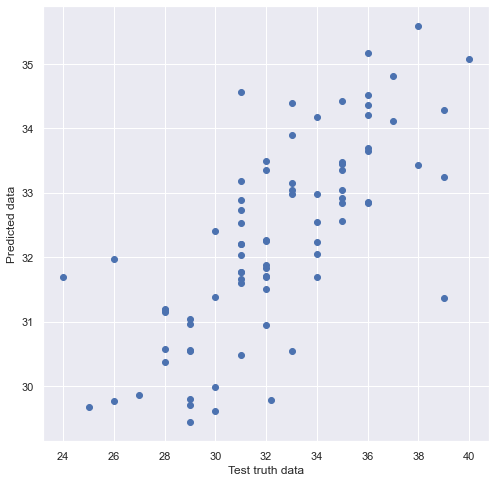

In [99]:
plt.scatter(y_test, elastic_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

#### 2. Residual should be normally distributed

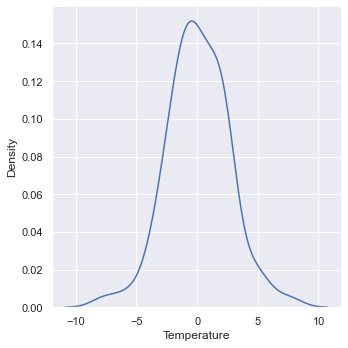

In [100]:
sns.displot( residual_elastic_reg, kind='kde')

#### 3. Residual and Predicted values should follow uniform distribution

Text(0, 0.5, 'Residuals')

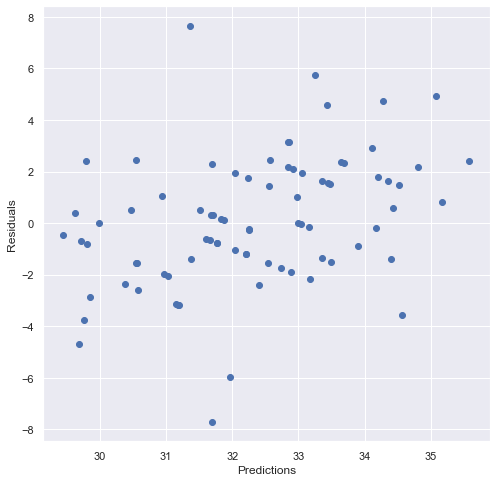

In [101]:
plt.scatter(elastic_reg_pred, residual_elastic_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

## Cost Function Values

In [102]:
print(f"MSE : {round(mean_squared_error(y_test,elastic_reg_pred),2)}")
print(f"MAE : {round(mean_absolute_error(y_test,elastic_reg_pred),2)}")
print(f"RMSE : {round(np.sqrt(mean_squared_error(y_test,elastic_reg_pred)),2)}")

MSE : 6.37
MAE : 1.95
RMSE : 2.52


## Performance Metrics

In [103]:
Elastic_score = r2_score(y_test,elastic_reg_pred)
print(f"R-Square Accuracy : {round(Elastic_score*100,2)}%")
print(f"Adjusted R-Square Accuracy : {round((1 - (1-Elastic_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100,2)}%")

R-Square Accuracy : 44.71%
Adjusted R-Square Accuracy : 36.81%


# Comparisions of all Models

## Cost Function Values

In [104]:
print("-------------------------------------------------------")
print(f"MSE:\n1. Linear Regression : {round(mean_squared_error(y_test,linear_reg_pred),2)}\n2. Ridge Regression : {round(mean_squared_error(y_test,ridge_reg_pred),2)}\n3. Lasso Regression : {round(mean_squared_error(y_test,lasso_reg_pred),2)}\n4. ElasticNet Regression : {round(mean_squared_error(y_test,elastic_reg_pred),2)}")
print("-------------------------------------------------------")
print(f"MAE:\n1. Linear Regression : {round(mean_absolute_error(y_test,linear_reg_pred),2)}\n2. Ridge Regression : {round(mean_absolute_error(y_test,ridge_reg_pred),2)}\n3. Lasso Regression : {round(mean_absolute_error(y_test,lasso_reg_pred),2)}\n4. ElasticNet Regression : {round(mean_absolute_error(y_test,elastic_reg_pred),2)}")
print("-------------------------------------------------------")
print(f"RMSE:\n1. Linear Regression : {round(np.sqrt(mean_squared_error(y_test,linear_reg_pred)),2)}\n2. Ridge Regression : {round(np.sqrt(mean_squared_error(y_test,ridge_reg_pred)),2)}\n3. Lasso Regression : {round(np.sqrt(mean_squared_error(y_test,lasso_reg_pred)),2)}\n4. ElasticNet Regression : {round(np.sqrt(mean_squared_error(y_test,elastic_reg_pred)),2)}")
print("-------------------------------------------------------")

-------------------------------------------------------
MSE:
1. Linear Regression : 5.01
2. Ridge Regression : 4.99
3. Lasso Regression : 7.06
4. ElasticNet Regression : 6.37
-------------------------------------------------------
MAE:
1. Linear Regression : 1.74
2. Ridge Regression : 1.74
3. Lasso Regression : 2.07
4. ElasticNet Regression : 1.95
-------------------------------------------------------
RMSE:
1. Linear Regression : 2.24
2. Ridge Regression : 2.23
3. Lasso Regression : 2.66
4. ElasticNet Regression : 2.52
-------------------------------------------------------


## Performance Metrics

In [105]:
print("-------------------------------------------------------")
print(f"R-Square Accuracy:\n1. Linear Regression : {round(linear_score*100,2)}%\n2. Ridge Regression : {round(Ridge_score*100,2)}%\n3. Lasso Regression : {round(lasso_score*100,2)}%\n4. ElasticNet Regression : {round(Elastic_score*100,2)}%")
print("-------------------------------------------------------")
print("Adjusted R-Square Accuracy:")
print(f"Linear Regression : {round((1 - (1-linear_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100,2)}%")
print(f"Ridge Regression : {round((1 - (1-Ridge_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100,2)}%")
print(f"Lasso Regression : {round((1 - (1-lasso_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100,2)}%")
print(f"ElasticNet Regression : {round((1 - (1-Elastic_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100,2)}%")
print("-------------------------------------------------------")

-------------------------------------------------------
R-Square Accuracy:
1. Linear Regression : 56.52%
2. Ridge Regression : 56.67%
3. Lasso Regression : 38.7%
4. ElasticNet Regression : 44.71%
-------------------------------------------------------
Adjusted R-Square Accuracy:
Linear Regression : 50.31%
Ridge Regression : 50.48%
Lasso Regression : 29.94%
ElasticNet Regression : 36.81%
-------------------------------------------------------


# Conslusion

- If you use the date feature without categorizing then our accuracy will be around 50 % and after the inclusion of categorization it has increased to 66 %, though it is not so good.
- We can remove skewness from the data and also can use some method to handle imbalanced data in Rain feature. This is just a basic model. I will add all the possible techniques to improve accuracy in next session.